In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv( "Mobile/user_behavior_dataset.csv" )

In [6]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [14]:
df.columns = [ "user" , "device" , "os" , "appusage" , "screentime" , "batterydrain" , "apps" , "data" , "age" , "gender" , "class" ]

In [29]:
df.boxplot( column="screentime"   )

<Axes: >

In [27]:
df["appscategory"] =  pd.cut( df["apps"] , bins=5 , labels=["cat1","cat2","cat3","cat4","cat5"] )

In [31]:
df.boxplot( column="screentime" , by="appscategory" )

<Axes: title={'center': 'screentime'}, xlabel='appscategory'>

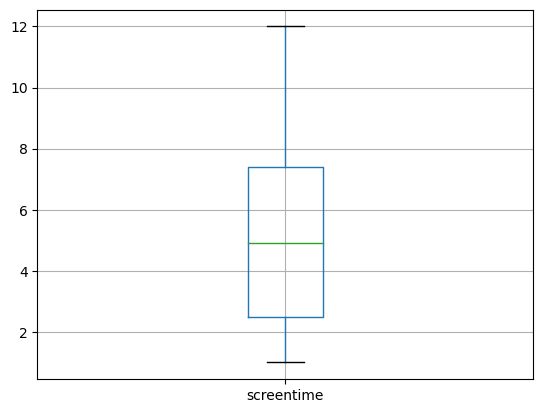

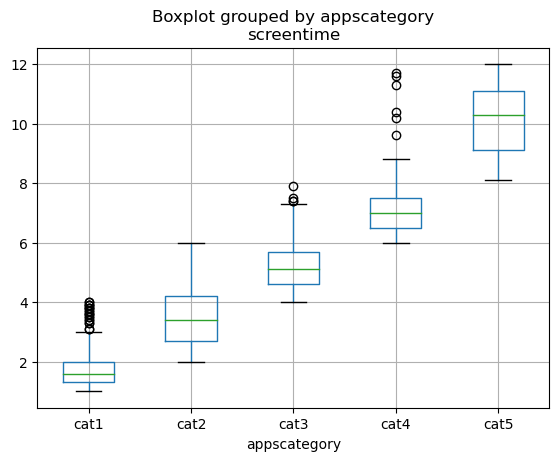

In [36]:
plt.show()

In [42]:
df.loc[ df["appscategory"] == "cat5" ].describe()

,user,appusage,screentime,batterydrain,apps,data,age,class
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.0
mean,340.937984,541.007752,10.093023,2700.387597,89.697674,1973.581395,38.031008,5.0
std,201.200295,31.015746,1.137307,177.401527,5.271688,295.325131,11.904528,0.0
min,8.000000,481.000000,8.100000,2403.000000,82.000000,1508.000000,18.000000,5.0
25%,167.000000,516.000000,9.100000,2547.000000,85.000000,1717.000000,28.000000,5.0
50%,362.000000,539.000000,10.300000,2717.000000,90.000000,1935.000000,36.000000,5.0
75%,510.000000,566.000000,11.100000,2857.000000,93.000000,2192.000000,49.000000,5.0
max,695.000000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.0


In [46]:
df.loc[ :  , ["device","os"] ].drop_duplicates()

,device,os
0,Google Pixel 5,Android
1,OnePlus 9,Android
2,Xiaomi Mi 11,Android
4,iPhone 12,iOS
6,Samsung Galaxy S21,Android


In [58]:
df.loc[ df["os"] == "iOS" , : ].boxplot( column="screentime" , by="appscategory" )

<Axes: title={'center': 'screentime'}, xlabel='appscategory'>

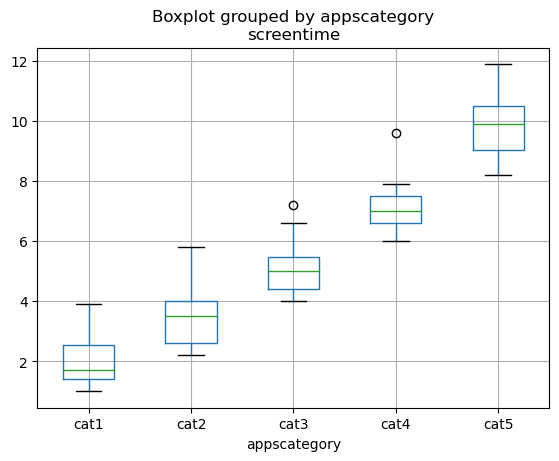

In [60]:
plt.show()

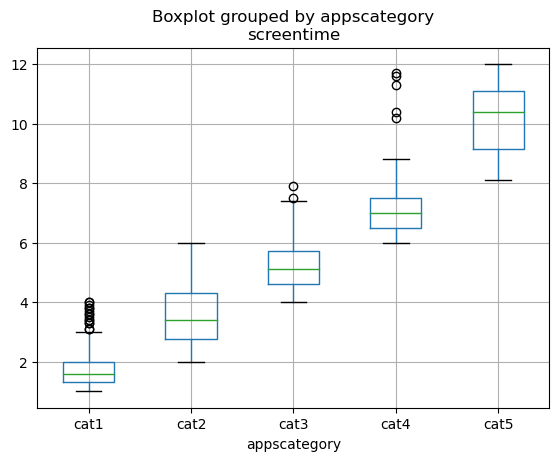

In [62]:
df.loc[ df["os"] == "Android" , : ].boxplot( column="screentime" , by="appscategory" )
plt.show()

In [66]:
df.groupby( "os" ).agg( { "user": ["count"] } ) / 700

,user
,count
os,
Android,0.791429
iOS,0.208571
